# Show_OLP_data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from math import e

import package_DBR
from package_DBR import myRound, FOPDT, SOPDT, Process, Bode

# Load data

In [2]:
Directory = 'Data/'

nameFile = 'Open_loop_experiment_on_MV_2023-03-15-22h10.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'

titleName = nameFile.split('.')[0]    
data = pd.read_csv(Directory + nameFile)

t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values

# Plot loaded data

(45.0, 55.0)

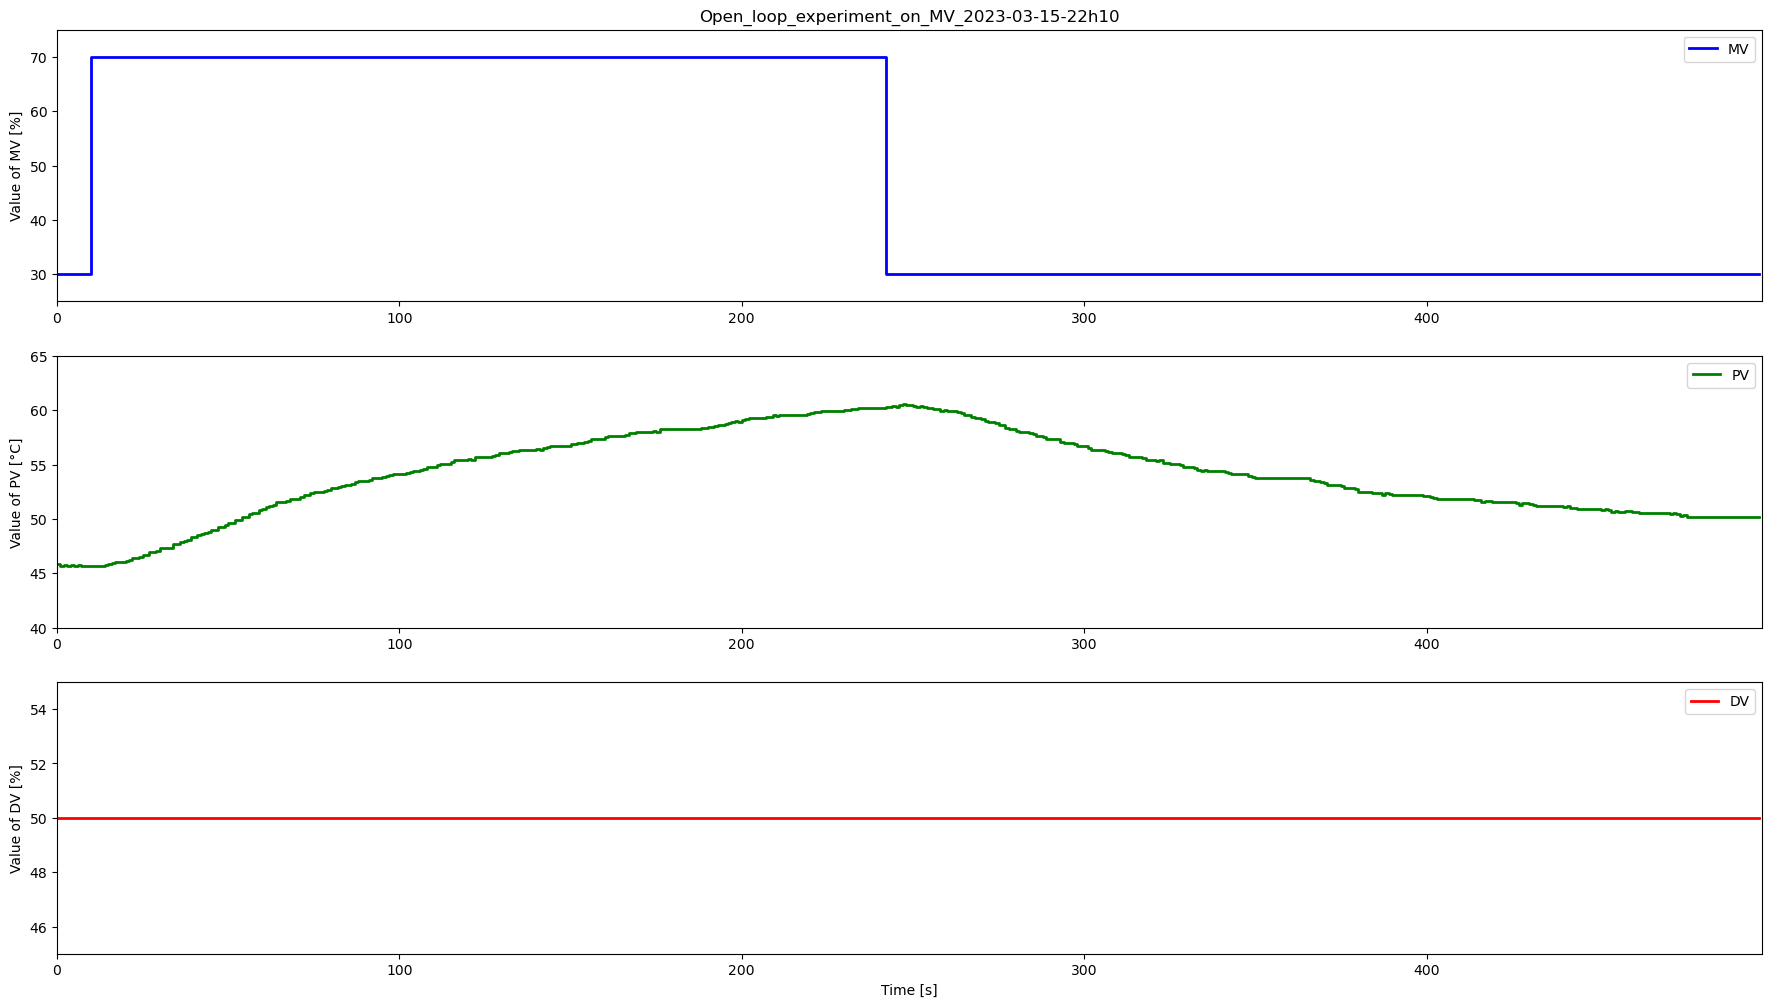

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t,MV)
l2.set_data(t,PV)
l3.set_data(t,DV)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)
ax3.set_xlim(0, t[-1]+1)

ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)

# if not os.path.exists('Plots'):
#     os.makedirs('Plots')

# plt.savefig('Plots\\' + titleName + '.png',transparent=True)
# plt.savefig('Plots\\' + titleName + '.pdf',transparent=True) 

# Clean data

In [4]:
if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

# Plot cleaned data

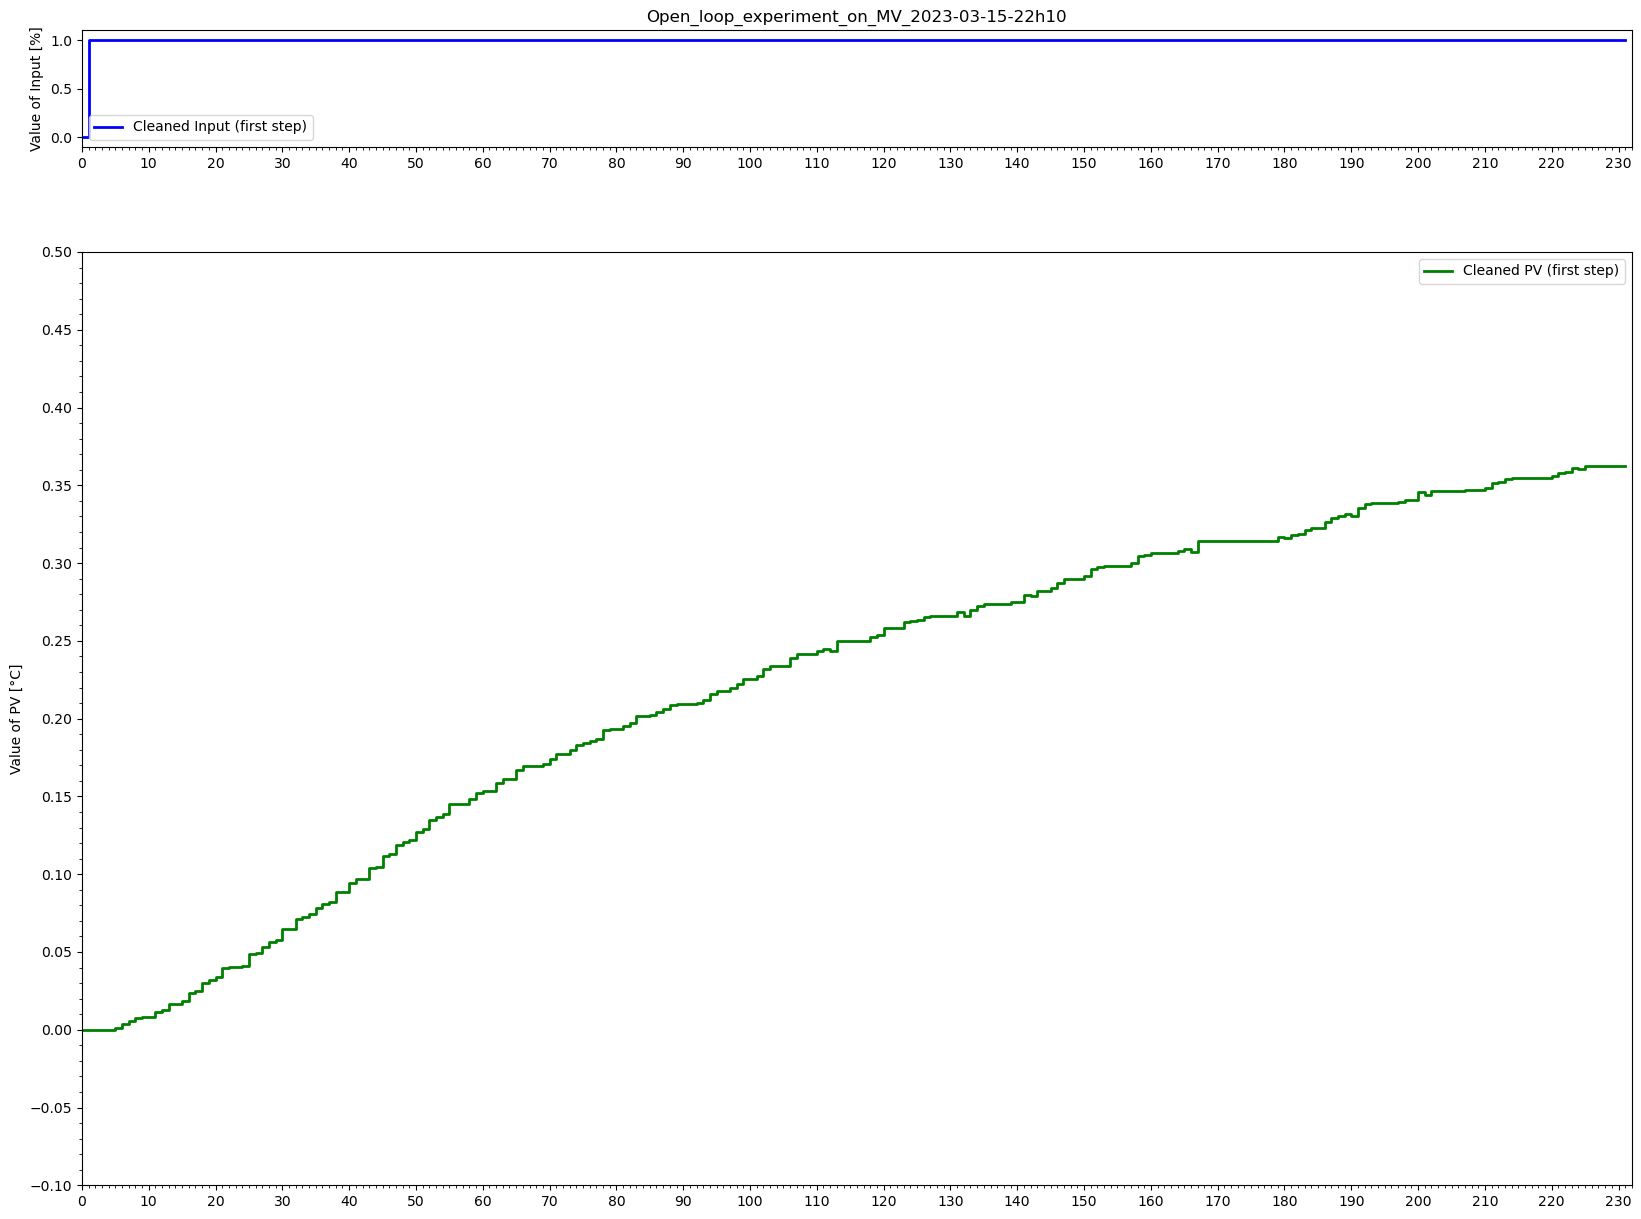

In [5]:
if ExpVariable == 'MV':
    Input = MVm
else:
    Input = DVm
    
DInput = np.diff(Input)
Index = np.where(np.diff(Input) != 0)[0]

Input = Input[0:Index[-1]]
Output = PVm[0:Index[-1]]
t = tm[0:Index[-1]]

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 8]})
fig.set_figheight(15)
fig.set_figwidth(20)

l1, = ax1.step([0,1],[0,1],'b-',linewidth=2,label='Cleaned Input (first step)',where='post')
ax1.set_ylabel('Value of Input [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')
l1.set_data(t,Input)
ax1.set_ylim(myRound(np.min(Input),1)-0.1, myRound(np.max(Input),1)+0.1)  

l2, = ax2.step([0,1],[0,1],'g-',linewidth=2,label='Cleaned PV (first step)',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(t,Output)
ax2.set_ylim(myRound(np.min(Output),0.1)-0.1, myRound(np.max(Output),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

# Axis minor and major ticks
multiplier = 10
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_major_locator(locator)    
ax2.xaxis.set_major_locator(locator)

multiplier = 1
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_minor_locator(locator)    
ax2.xaxis.set_minor_locator(locator)    
    
multiplier = 0.05
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_major_locator(locator)
    
multiplier = 0.01
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_minor_locator(locator)

if not os.path.exists('Plots'):
    os.makedirs('Plots')

plt.savefig('Plots\Graphical_methods_' + titleName + '.png',transparent=True)
plt.savefig('Plots\Graphical_methods_' + titleName + '.pdf',transparent=True) 

# Parameters optimal FOPDT & SOPDT models

In [6]:
##### PROF #####
# Kp_FOPDTOPT =  0.641385517048875
# T_FOPDTOPT =  149.43608555708562
# theta_FOPDTOPT = 1.7320594694101374

# Kp_SOPDTOPT = 0.632682416080663
# T1_SOPDTOPT = 145.96213298560875
# T2_SOPDTOPT = 0.6387249801398736
# theta_SOPDTOPT = 1.3525143558113142

##### Open_loop_experiment_on_MV_2023-03-14-09h42.txt #####
# First Order
# Final SSE Objective: 0.031031767684449905
# K: 0.40669430923855066
# T: 98.90040071373325
# theta: 3.000046001255484

# Second Order
# Final SSE Objective: 0.030656077451562767
# K: 0.40734503056551663
# T1: 99.77466590602802
# T2: 0.39354822562470393
# theta: 2.1689122314074334

##### Open_Loop_Experiment_on_MV_2023-03-15-22h10.txt #####
# Final SSE Objective: 0.030594044745198026
# K: 0.5245636649067374
# T: 181.35884184872623
# theta: 2.3272566428324986

# Final SSE Objective: 0.03371973981000359
# K: 0.5310660848084217
# T1: 186.994025442462
# T2: 2.9068218394939005e-05
# theta: 2.999961859860621

##### Open_loop_experiment_on_DV_2023-03-22-18h46.txt #####
# Final SSE Objective: 0.10404923581072524
# K: 0.6122331547582122
# T: 263.5317995762215
# theta: 11.168239348862704

# Final SSE Objective: 0.09926305385032501
# K: 0.6100735687252915
# T1: 260.50316881553425
# T2: 10.615160143180168
# theta: 1.1476745182375387

Kp_FOPDTOPT =  0.40669430923855066
T_FOPDTOPT =  98.90040071373325
theta_FOPDTOPT = 3.000046001255484

Kp_SOPDTOPT = 0.40734503056551663
T1_SOPDTOPT = 99.77466590602802
T2_SOPDTOPT = 0.39354822562470393
theta_SOPDTOPT = 2.1689122314074334

Ts = 1

# Parameters graphical models

In [7]:
Kp_graph = 0.33
t1_graph = 31.5
t2_graph = 42.5
Tu_graph = 7.5
Tg_graph = 85
a_graph = 0.09

## Simple Broida Model

In [8]:
T_SB = Tg_graph
theta_SB = Tu_graph

## Complicated Broida Model

In [9]:
T_CB = 5.5 * (t2_graph - t1_graph)
theta_CB = 2.8 * t1_graph - 1.8 * t2_graph

## Van der Grinten Model

In [10]:
# This model is not applicable because time constant is negative
T1_VDG = (Tg_graph * (3 * a_graph * e - 1)) / (1 + a_graph * e)
T2_VDG = (Tg_graph * (1 - a_graph * e)) / (1 + a_graph * e)
theta_VDG = Tu_graph - (T1_VDG * T2_VDG) / (T1_VDG + 3 * T2_VDG)

## Strejc Model

In [11]:
# a1< Tu/Tg < a2 => n = 1
T_ST = Tg_graph
theta_ST = Tu_graph

# Compare step responses (experiment compared with optimal FOPDT & SOPDT)

(0.0, 488.0)

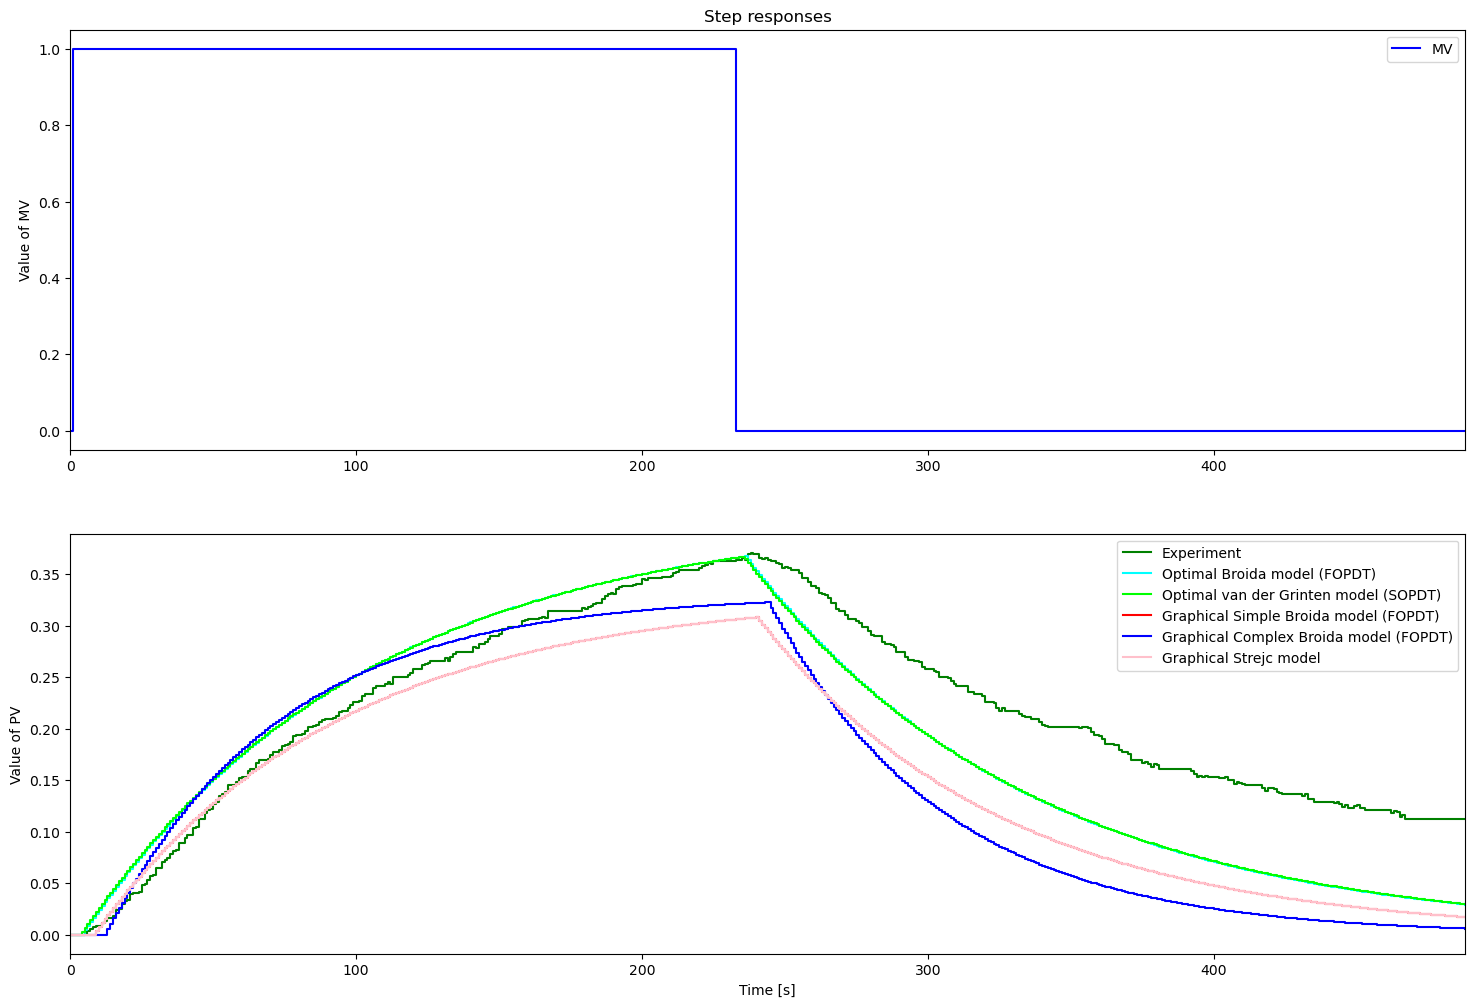

In [12]:
PV_SOPDTOPT = SOPDT(MVm,Kp_SOPDTOPT,T1_SOPDTOPT,T2_SOPDTOPT,theta_SOPDTOPT,Ts)
PV_FOPDTOPT = FOPDT(MVm,Kp_FOPDTOPT,T_FOPDTOPT,theta_FOPDTOPT,Ts)
PV_SB = FOPDT(MVm,Kp_graph,T_SB,theta_SB,Ts)
PV_CB = FOPDT(MVm,Kp_graph,T_CB,theta_CB,Ts)
PV_VDG = SOPDT(MVm,Kp_graph,T1_VDG,T2_VDG,theta_VDG,Ts)
PV_ST = FOPDT(MVm,Kp_graph,T_ST,theta_ST,Ts)

plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
plt.step(tm,MVm,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Step responses')
plt.legend(loc='best')
plt.xlim([0, np.max(tm)])   

plt.subplot(2,1,2)
plt.step(tm,PVm,'g-',label='Experiment',where='post')
plt.step(tm,PV_FOPDTOPT,'cyan',label='Optimal Broida model (FOPDT)',where='post')
plt.step(tm,PV_SOPDTOPT,'lime',label='Optimal van der Grinten model (SOPDT)',where='post')
plt.step(tm,PV_SB,'red',label='Graphical Simple Broida model (FOPDT)',where='post')
plt.step(tm,PV_CB,'blue',label='Graphical Complex Broida model (FOPDT)',where='post')
# plt.step(tm,PV_VDG,'green',label='Graphical van der Grinten model (SOPDT)',where='post')  # this model does not work because time constant is negative
plt.step(tm,PV_ST,'pink',label='Graphical Strejc model',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')  
plt.xlim([0, np.max(tm)])

# Compare Bode diagrams (optimal FOPDT & SOPDT)

Text(0, 0.5, 'Phase [°]')

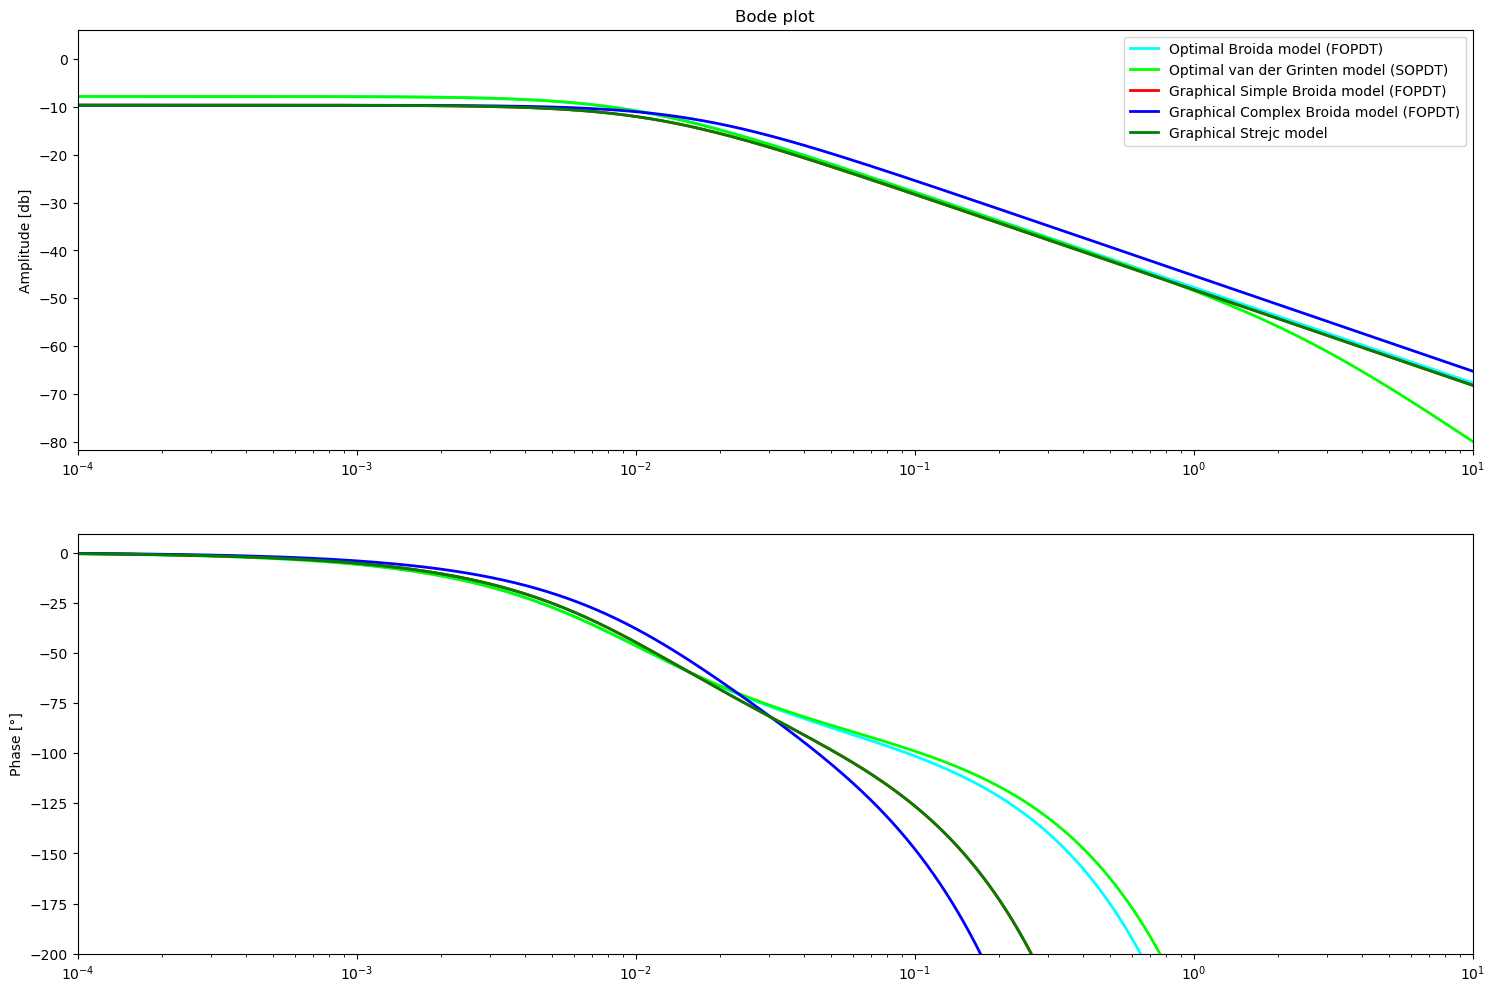

In [13]:
# Frequency response
P_FOPDTOPT = Process({})
P_FOPDTOPT.parameters['Kp'] = Kp_FOPDTOPT
P_FOPDTOPT.parameters['Tlag1'] = T_FOPDTOPT
P_FOPDTOPT.parameters['theta'] = theta_FOPDTOPT

# Frequency response
P_SOPDTOPT = Process({})
P_SOPDTOPT.parameters['Kp'] = Kp_SOPDTOPT
P_SOPDTOPT.parameters['Tlag1'] = T1_SOPDTOPT
P_SOPDTOPT.parameters['Tlag2'] = T2_SOPDTOPT
P_SOPDTOPT.parameters['theta'] = theta_SOPDTOPT

# Frequency response
P_SB = Process({})
P_SB.parameters['Kp'] = Kp_graph
P_SB.parameters['Tlag1'] = T_SB
P_SB.parameters['theta'] = theta_SB

# Frequency response
P_CB = Process({})
P_CB.parameters['Kp'] = Kp_graph
P_CB.parameters['Tlag1'] = T_CB
P_CB.parameters['theta'] = theta_CB

# Frequency response
P_ST = Process({})
P_ST.parameters['Kp'] = Kp_graph
P_ST.parameters['Tlag1'] = T_ST
P_ST.parameters['theta'] = theta_ST

omega = np.logspace(-4, 1, 10000)
Ps_FOPDTOPT = Bode(P_FOPDTOPT,omega,Show=False) # Optimal Broida
Ps_SOPDTOPT = Bode(P_SOPDTOPT,omega,Show=False) # Optimal van der Grinten
Ps_SB = Bode(P_SB,omega,Show=False) #Graphical Simple Broida
Ps_CB = Bode(P_CB,omega,Show=False) #Graphical Complex Broida
Ps_ST = Bode(P_ST,omega,Show=False) #Graphical Complex Broida

plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
gain_min = np.min(20*np.log10(np.abs(Ps_FOPDTOPT)/5))
gain_max = np.max(20*np.log10(np.abs(Ps_FOPDTOPT)*5))
plt.semilogx(omega,20*np.log10(np.abs(Ps_FOPDTOPT)),'cyan',linewidth=2,label='Optimal Broida model (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_SOPDTOPT)),'lime',linewidth=2,label='Optimal van der Grinten model (SOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_SB)),'red',linewidth=2,label='Graphical Simple Broida model (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_CB)),'blue',linewidth=2,label='Graphical Complex Broida model (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_ST)),'green',linewidth=2,label='Graphical Strejc model')
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude [db]')
plt.title('Bode plot')
plt.legend(loc='best')

plt.subplot(2,1,2)
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) + 10
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT)),'cyan',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_SOPDTOPT)),'lime',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_SB)),'red',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_CB)),'blue',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_ST)),'green',linewidth=2)
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([np.max([ph_min, -200]), ph_max])
plt.ylabel('Phase [°]')